In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [9]:
# Setting Styles
sns.set(style="whitegrid")


In [11]:
# Loading the Dataset
df = pd.read_csv(r"C:\Users\Abilasha\Downloads\Netflix_Stock_Price dataset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [13]:
# Displaying First Few Rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  05-02-2018  262.000000  267.899994  250.029999  254.259995  254.259995   
1  06-02-2018  247.699997  266.700012  245.000000  265.720001  265.720001   
2  07-02-2018  266.579987  272.450012  264.329987  264.559998  264.559998   
3  08-02-2018  267.079987  267.619995  250.000000  250.100006  250.100006   
4  09-02-2018  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [15]:
# Checking for Missing Values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [17]:
# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)


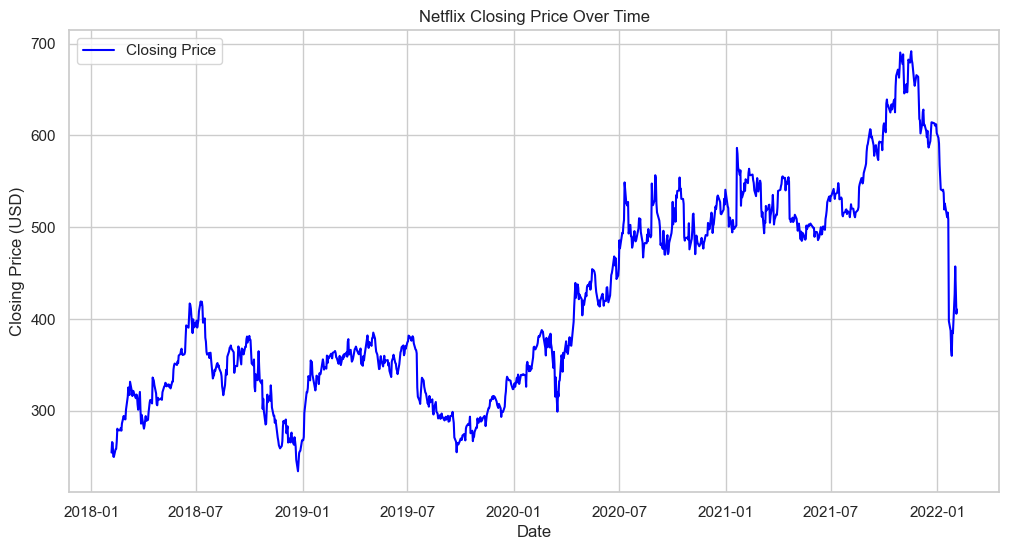

In [19]:
# Data Visualization - Closing Price Trend
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Netflix Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

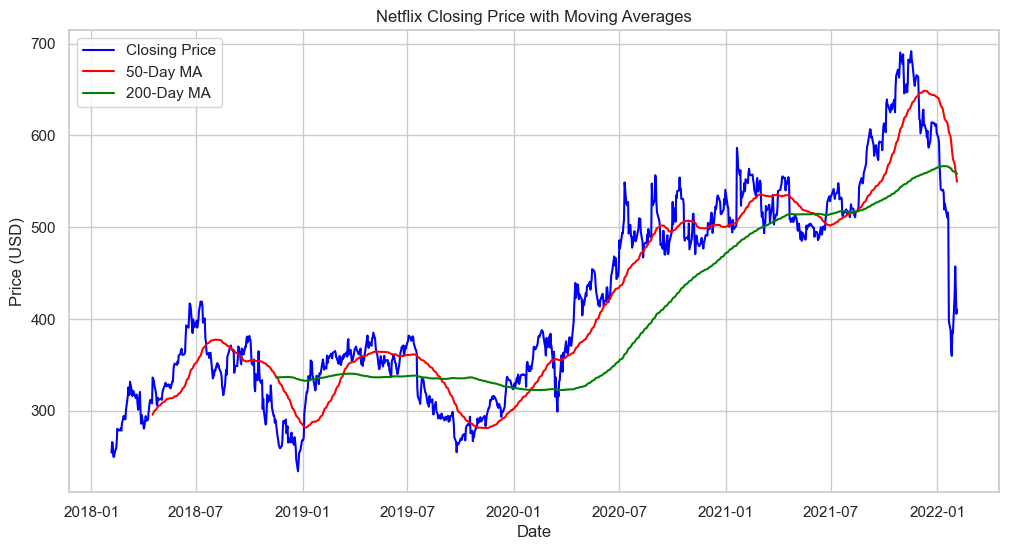

In [21]:
# Moving Averages
plt.figure(figsize=(12,6))
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA50'], label='50-Day MA', color='red')
plt.plot(df['MA200'], label='200-Day MA', color='green')
plt.title('Netflix Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

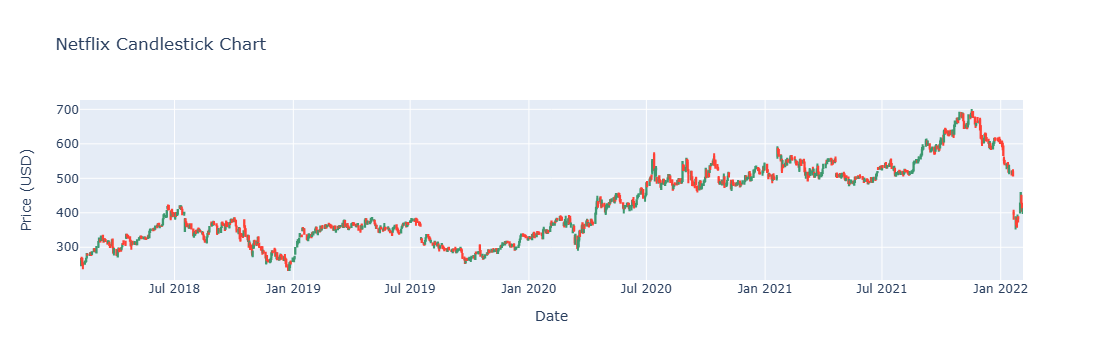

In [23]:
# Candlestick Chart Using Plotly
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])])
fig.update_layout(title='Netflix Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)', xaxis_rangeslider_visible=False)
fig.show()

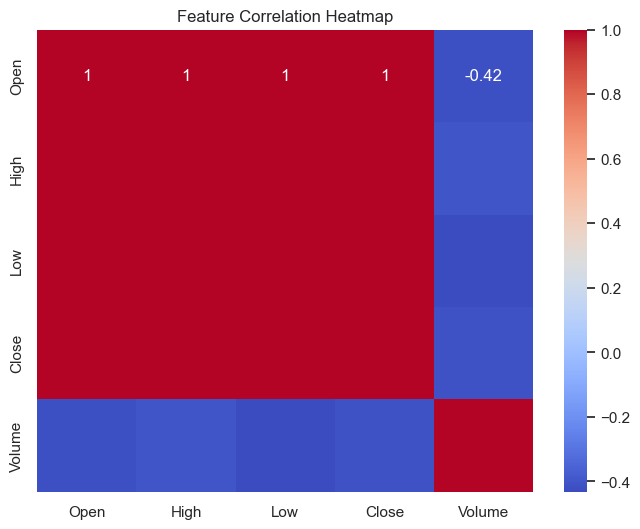

In [25]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
# Feature Selection
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

In [29]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Model 3: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Making Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


In [39]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel Evaluation: {name}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [41]:
# Evaluating All Models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Model Evaluation: Linear Regression
R2 Score: 0.9986
Mean Absolute Error: 2.8572
Root Mean Squared Error: 3.9971

Model Evaluation: Random Forest
R2 Score: 0.9976
Mean Absolute Error: 3.7096
Root Mean Squared Error: 5.2643

Model Evaluation: XGBoost
R2 Score: 0.9971
Mean Absolute Error: 3.9949
Root Mean Squared Error: 5.8041


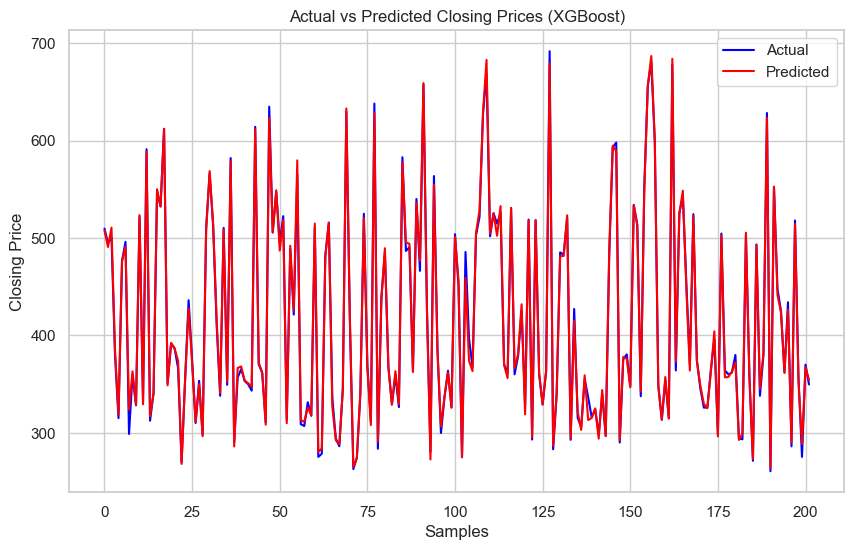

In [43]:
# Visualizing Actual vs Predicted for the Best Model (XGBoost)
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices (XGBoost)')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

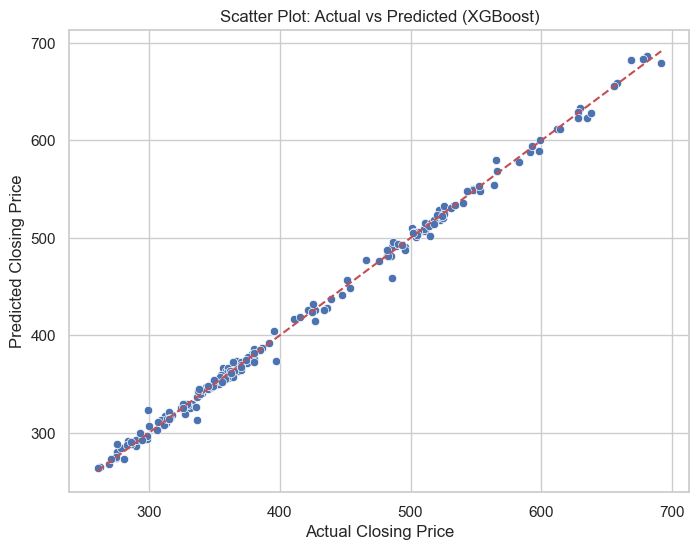

In [45]:
# Scatter Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Scatter Plot: Actual vs Predicted (XGBoost)')
plt.show()


In [47]:
# Feature Importance from XGBoost
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

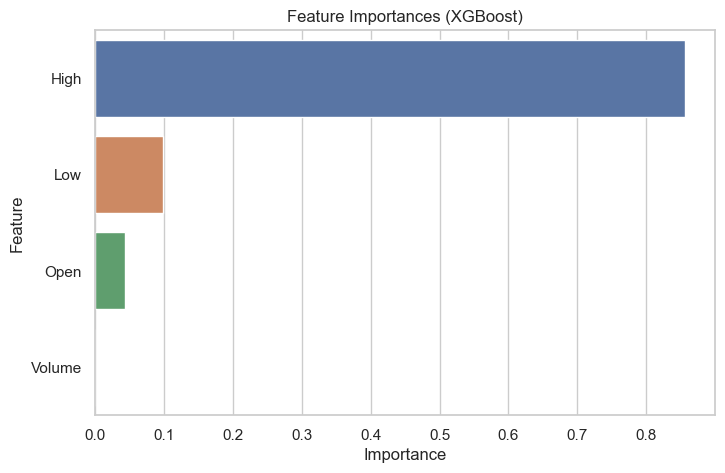

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (XGBoost)')
plt.show()